In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [3]:
df.shape

(10302, 25)

In [4]:
df['INCOME'] = df['INCOME'].str.replace('$', '').str.replace(',', '')
df['HOME_VAL'] = df['HOME_VAL'].str.replace('$', '').str.replace(',', '')
df['OLDCLAIM'] = df['OLDCLAIM'].str.replace('$', '').str.replace(',', '')
df['CLM_AMT'] = df['CLM_AMT'].str.replace('$', '').str.replace(',', '')
df['BLUEBOOK'] = df['BLUEBOOK'].str.replace('$', '').str.replace(',', '')

# Convert the 'price' column to numeric if needed
df['INCOME'] = pd.to_numeric(df['INCOME'])
df['HOME_VAL'] = pd.to_numeric(df['HOME_VAL'])
df['OLDCLAIM'] = pd.to_numeric(df['OLDCLAIM'])
df['CLM_AMT'] = pd.to_numeric(df['CLM_AMT'])
df['BLUEBOOK'] = pd.to_numeric(df['BLUEBOOK'])

In [5]:
objColums = df.select_dtypes(exclude=['number'])
objColums

,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No
2,No,z_No,M,Bachelors,Manager,Private,Van,yes,No
3,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No
4,No,Yes,M,<High School,z_Blue Collar,Private,Minivan,yes,No
...,...,...,...,...,...,...,...,...,...
10297,No,Yes,M,PhD,Manager,Private,Minivan,no,No
10298,No,Yes,M,Masters,NaN,Commercial,Panel Truck,no,No
10299,No,Yes,z_F,<High School,z_Blue Collar,Private,z_SUV,no,No
10300,No,Yes,z_F,Bachelors,Home Maker,Private,Minivan,no,No


In [6]:
for col in objColums.columns:
    print(f"For column {col} ",df[col].unique(),"\n")

For column PARENT1  ['No' 'Yes'] 

For column MSTATUS  ['z_No' 'Yes'] 

For column GENDER  ['M' 'z_F'] 

For column EDUCATION  ['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters'] 

For column OCCUPATION  ['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student'] 

For column CAR_USE  ['Private' 'Commercial'] 

For column CAR_TYPE  ['Minivan' 'Van' 'z_SUV' 'Sports Car' 'Panel Truck' 'Pickup'] 

For column RED_CAR  ['yes' 'no'] 

For column REVOKED  ['No' 'Yes'] 



In [7]:
for col in objColums.columns:
    df[col] = df[col].str.replace('z_', '')
df['EDUCATION'] = df['EDUCATION'].str.replace('<', 'less ')

In [8]:
for col in objColums.columns:
    print(f"For column {col} ",df[col].unique(),"\n")

For column PARENT1  ['No' 'Yes'] 

For column MSTATUS  ['No' 'Yes'] 

For column GENDER  ['M' 'F'] 

For column EDUCATION  ['PhD' 'High School' 'Bachelors' 'less High School' 'Masters'] 

For column OCCUPATION  ['Professional' 'Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student'] 

For column CAR_USE  ['Private' 'Commercial'] 

For column CAR_TYPE  ['Minivan' 'Van' 'SUV' 'Sports Car' 'Panel Truck' 'Pickup'] 

For column RED_CAR  ['yes' 'no'] 

For column REVOKED  ['No' 'Yes'] 



In [9]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,67349.0,No,0.0,No,M,...,11,Minivan,yes,4461,2,No,3,0,18.0,0
1,132761049,0,43.0,0,11.0,91449.0,No,257252.0,No,M,...,1,Minivan,yes,0,0,No,0,0,1.0,0
2,921317019,0,48.0,0,11.0,52881.0,No,0.0,No,M,...,1,Van,yes,0,0,No,2,0,10.0,0
3,727598473,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,...,4,SUV,no,38690,2,No,3,0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,...,7,Minivan,yes,0,0,No,0,0,6.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  int64  
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  int64  
 19  CLM_FREQ    10302 non-nul

In [11]:
df.nunique()

ID            8753
KIDSDRIV         5
AGE             61
HOMEKIDS         6
YOJ             21
INCOME        8151
PARENT1          2
HOME_VAL      6334
MSTATUS          2
GENDER           2
EDUCATION        5
OCCUPATION       8
TRAVTIME       100
CAR_USE          2
BLUEBOOK      2985
TIF             23
CAR_TYPE         6
RED_CAR          2
OLDCLAIM      3545
CLM_FREQ         6
REVOKED          2
MVR_PTS         14
CLM_AMT       2346
CAR_AGE         30
CLAIM_FLAG       2
dtype: int64

In [12]:
df.sample(5)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
10010,176260327,0,46.0,0,11.0,40577.0,No,136712.0,Yes,M,...,16,Van,yes,0,0,No,0,0,16.0,0
4706,462444610,0,40.0,0,11.0,90832.0,No,0.0,No,F,...,1,Pickup,no,3842,1,No,2,0,1.0,0
393,513623278,0,43.0,0,8.0,91877.0,No,298385.0,No,F,...,16,Sports Car,no,0,0,Yes,2,0,18.0,0
2079,730621223,0,47.0,0,10.0,4399.0,No,0.0,No,M,...,1,Van,yes,0,0,No,0,0,1.0,0
5538,541831702,0,39.0,0,NaN,102903.0,No,233330.0,Yes,F,...,6,SUV,no,3873,3,No,1,0,19.0,0


In [13]:
df.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [14]:
numDF = df.select_dtypes(include='number')
numDF
colImp = numDF.columns

In [15]:
from sklearn.impute import KNNImputer
imp = KNNImputer(weights='distance')
df.loc[:,colImp] = imp.fit_transform(numDF)

In [16]:
column_name = 'OCCUPATION'
mode_value = df[column_name].mode()[0]
df[column_name] = df[column_name].fillna(mode_value)

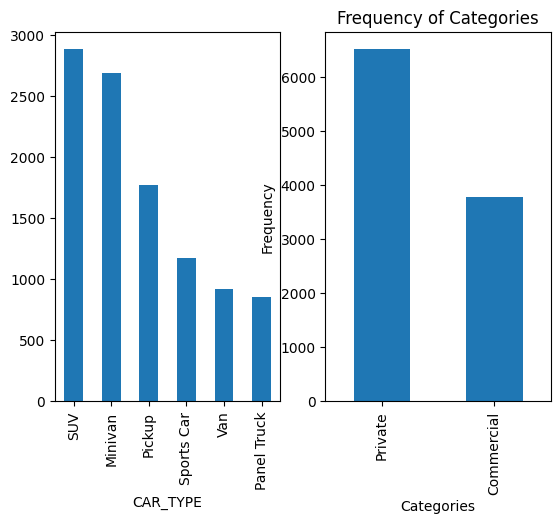

In [17]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
df['CAR_TYPE'].value_counts().plot(kind='bar')
# plt.plot(df['CAR_TYPE'].value_counts())
plt.subplot(1,2,2)
df['CAR_USE'].value_counts().plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


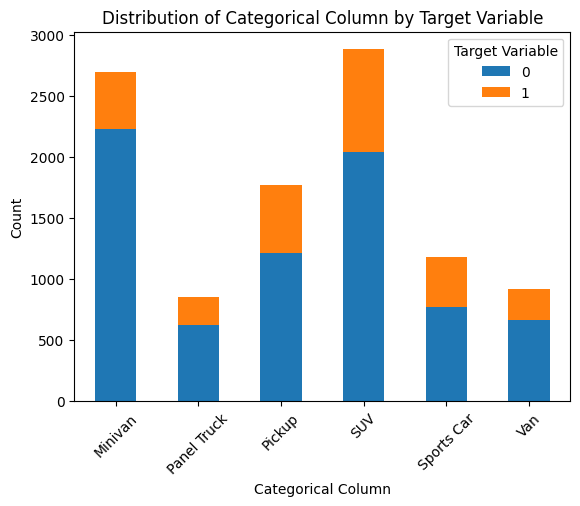

In [18]:
grouped = df.groupby(['CAR_TYPE', 'CLAIM_FLAG']).size().unstack()

# Plot the grouped data
grouped.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Distribution of Categorical Column by Target Variable')
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title='Target Variable')

# Show the plot
plt.show()


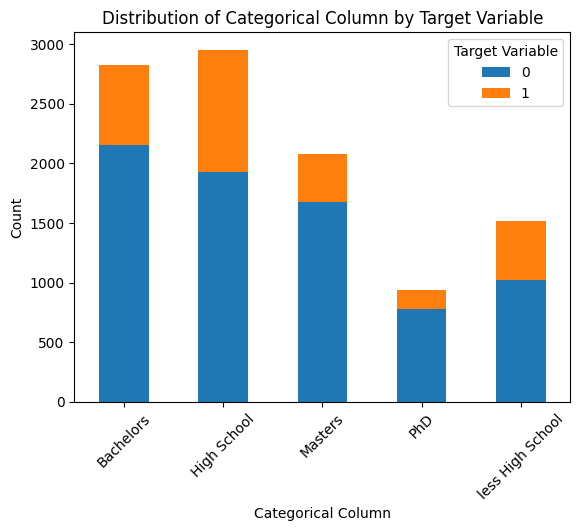

In [19]:

grouped2 = df.groupby(['EDUCATION', 'CLAIM_FLAG']).size().unstack()

# Plot the grouped data
grouped2.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Distribution of Categorical Column by Target Variable')
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title='Target Variable')

# Show the plot
plt.show()


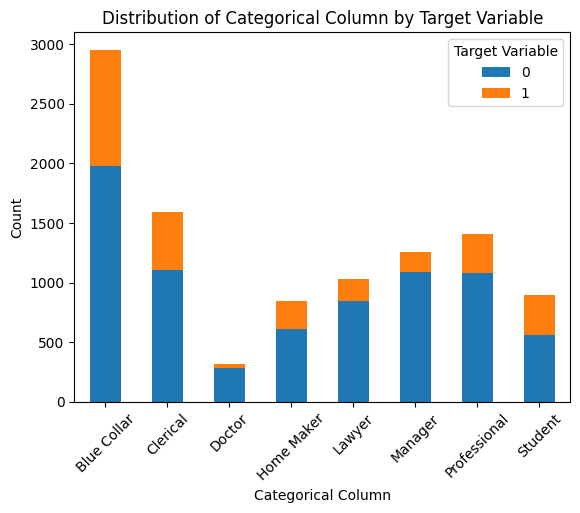

In [20]:

grouped2 = df.groupby(['OCCUPATION', 'CLAIM_FLAG']).size().unstack()

# Plot the grouped data
grouped2.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Distribution of Categorical Column by Target Variable')
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.legend(title='Target Variable')

# Show the plot
plt.show()


In [21]:

encodCol = df.select_dtypes(exclude='number').columns.tolist()
for col in df.loc[:,encodCol]:
    df[col] = df[col].astype(str)
encodCol.remove('EDUCATION')
print(encodCol)

['PARENT1', 'MSTATUS', 'GENDER', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED']


In [22]:
## Now doing encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',dtype=np.int32)

In [23]:
X_new = ohe.fit_transform(df[encodCol]).toarray()
newMat = pd.DataFrame(X_new,columns=ohe.get_feature_names_out(encodCol))
newMat

,PARENT1_Yes,MSTATUS_Yes,GENDER_M,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,RED_CAR_yes,REVOKED_Yes
0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
10298,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10299,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10300,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
col = df['EDUCATION'].unique()
col

array(['PhD', 'High School', 'Bachelors', 'less High School', 'Masters'],
      dtype=object)

In [25]:
order = {'less High School':0,'High School':1,'Bachelors':2,'Masters':3,'PhD':4}
df['EDUCATION'] = df['EDUCATION'].map(order)

In [26]:
df.drop(columns=encodCol,axis=1,inplace=True)
df = pd.concat([df, newMat],axis=1)

In [27]:
df.drop(columns='ID',inplace=True)

Correlation Matrix with heatmap:


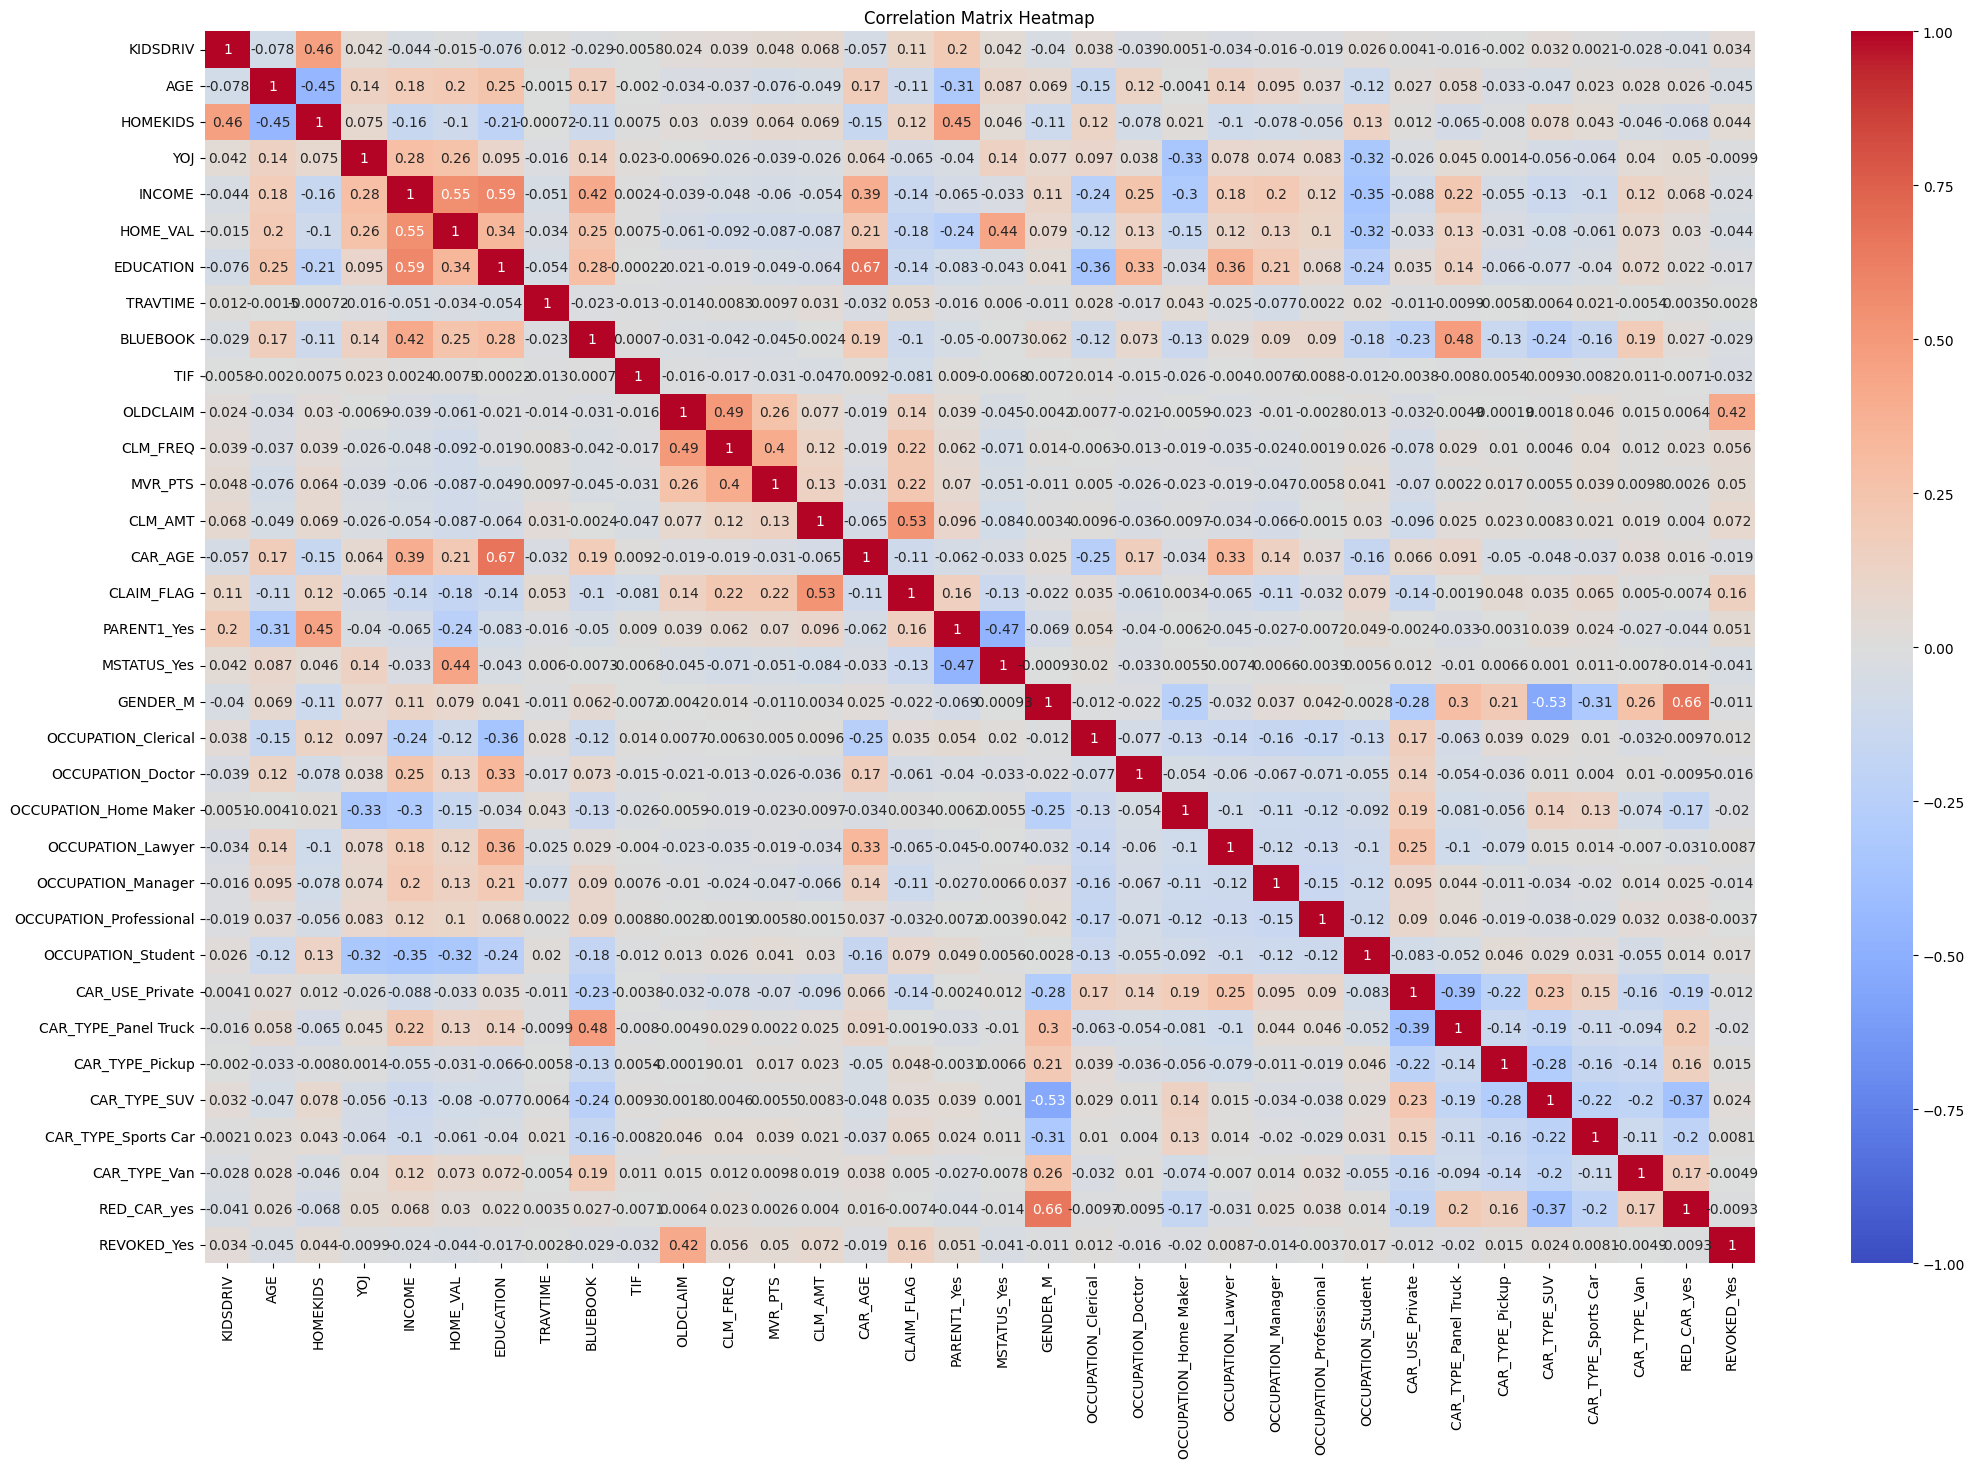

In [28]:
import seaborn as sns
df = df

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix with heatmap:")

# Create a heatmap for better visualization
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix,  cmap="coolwarm", vmin=-1, vmax=1,annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [29]:
# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Display the rows with outliers
df_outliers = df[outliers]

df_outliers


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,...,OCCUPATION_Professional,OCCUPATION_Student,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,RED_CAR_yes,REVOKED_Yes
0,0,60.0,0,11.000000,67349.000000,0.0,4,14,14230,11,...,1,0,1,0,0,0,0,0,1,0
2,0,48.0,0,11.000000,52881.000000,0.0,2,26,21970,1,...,0,0,1,0,0,0,0,1,1,0
3,0,35.0,1,10.000000,16039.000000,124191.0,1,5,4010,4,...,0,0,1,0,0,1,0,0,0,0
4,0,51.0,0,14.000000,184787.574264,306251.0,0,32,15440,7,...,0,0,1,0,0,0,0,0,1,0
5,0,50.0,0,13.323977,114986.000000,243925.0,4,36,18000,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,35.0,0,11.000000,43112.000000,0.0,1,51,27330,10,...,0,0,0,1,0,0,0,0,1,0
10297,1,45.0,2,9.000000,164669.000000,386273.0,4,21,13270,15,...,0,0,1,0,0,0,0,0,0,0
10298,0,46.0,0,9.000000,107204.000000,332591.0,3,36,24490,6,...,0,0,0,1,0,0,0,0,0,0
10300,0,50.0,0,7.000000,43445.000000,149248.0,2,36,22550,6,...,0,0,1,0,0,0,0,0,0,0


In [33]:
x2 = df.drop(columns='CLAIM_FLAG')

In [34]:
from sklearn.preprocessing import PowerTransformer
pwt = PowerTransformer()
colTransform = x2.columns
df[colTransform] = pwt.fit_transform(df[colTransform])

Correlation Matrix with heatmap:


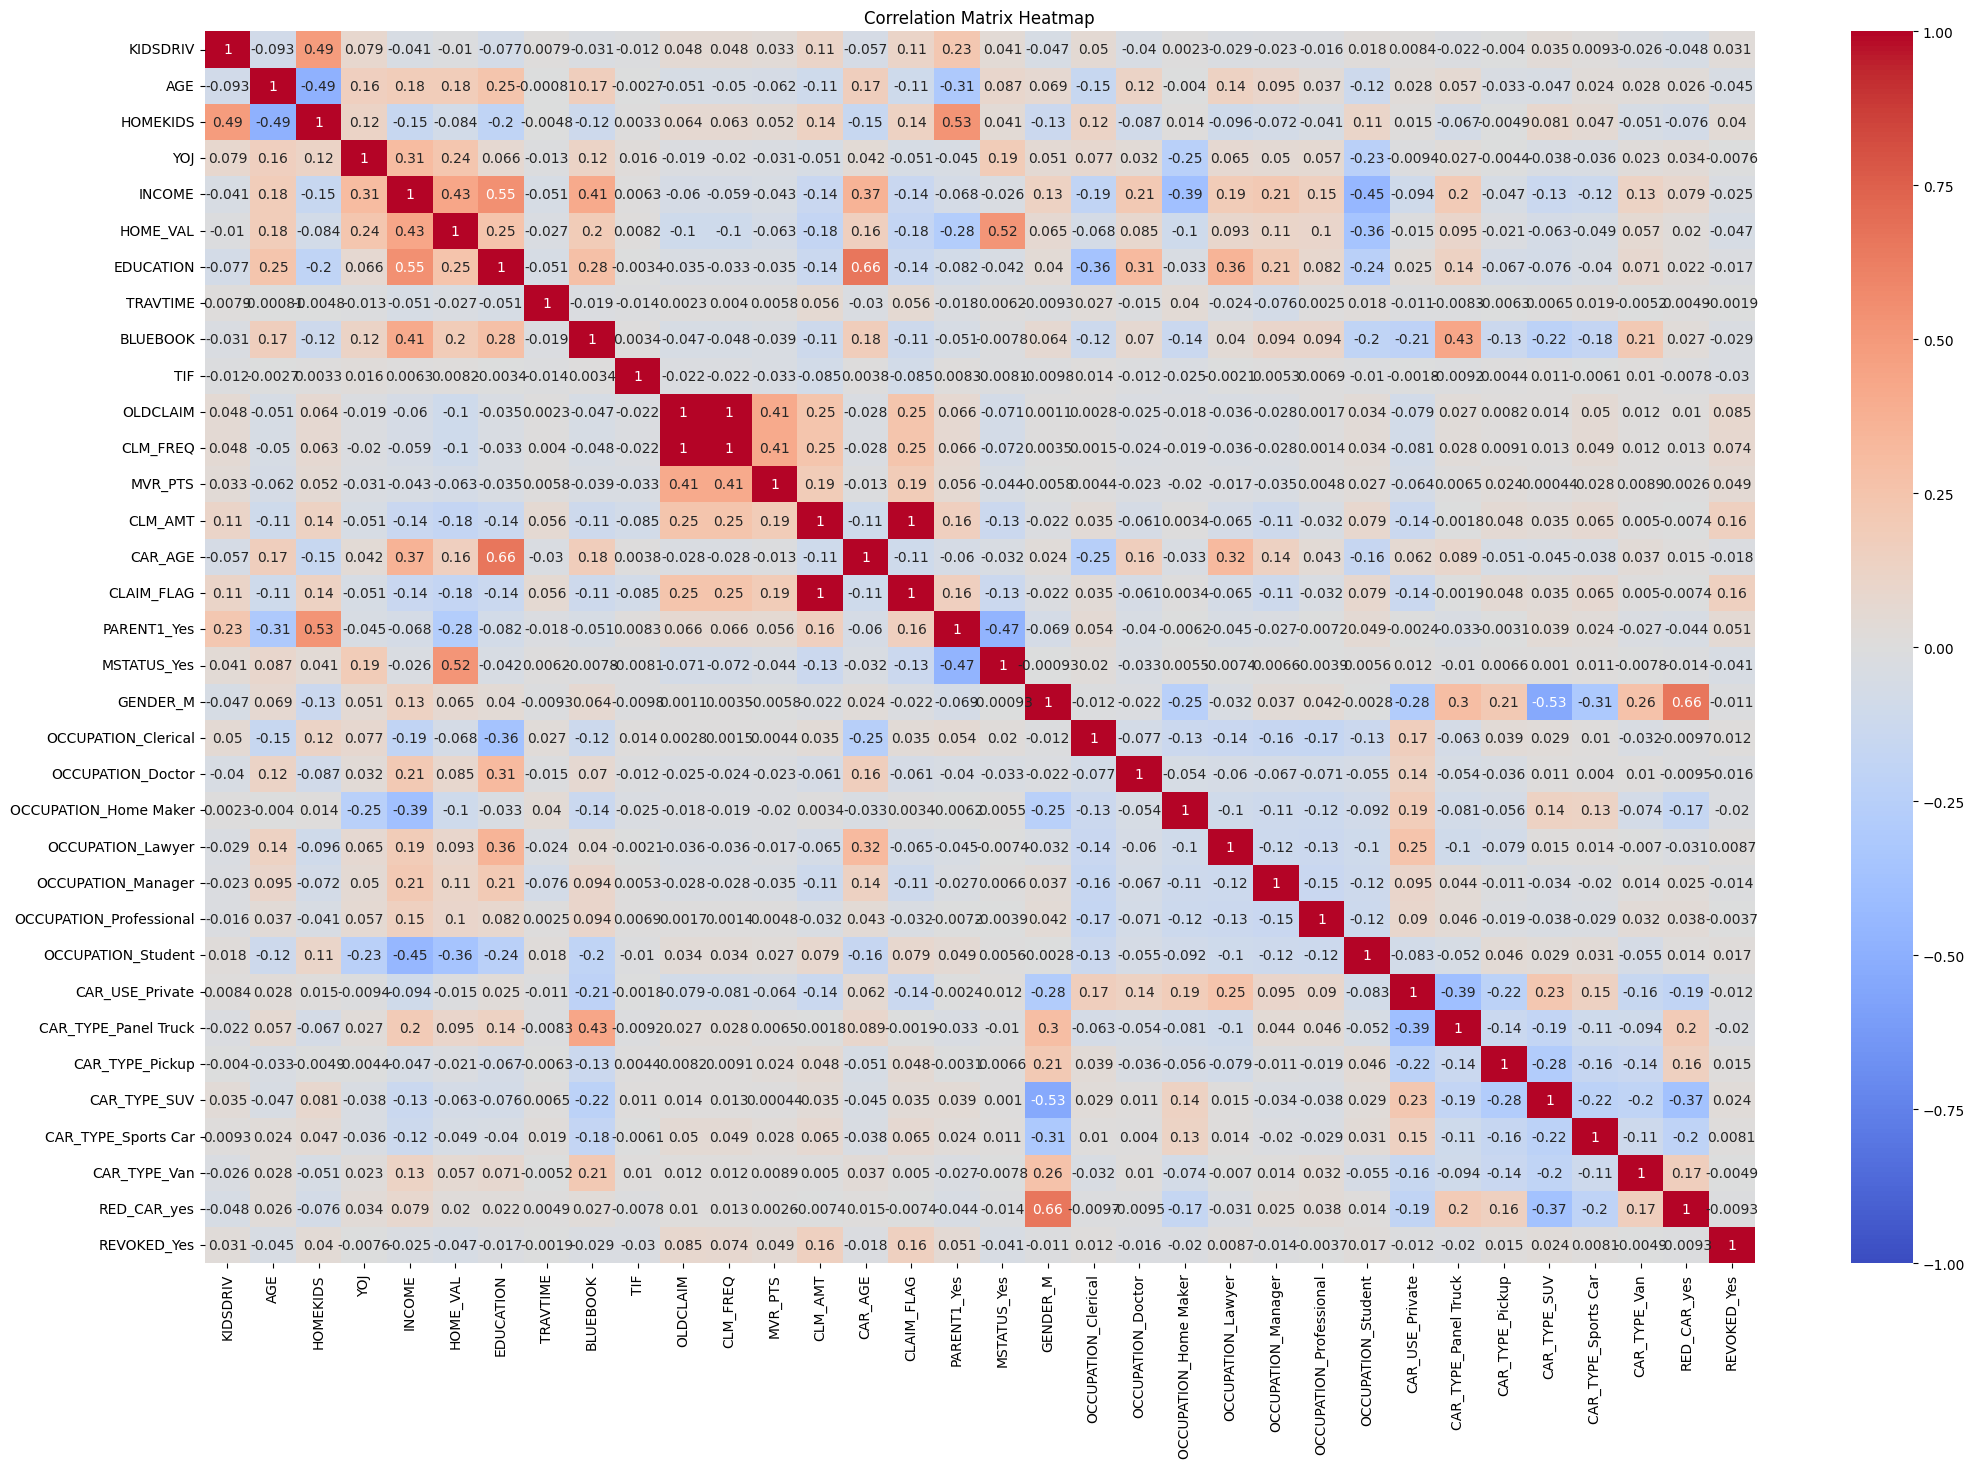

In [54]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix with heatmap:")

# Create a heatmap for better visualization
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix,  cmap="coolwarm", vmin=-1, vmax=1,annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [35]:
x = df.drop(columns='CLAIM_FLAG')
y = df['CLAIM_FLAG']

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [70]:
df.shape

(10302, 34)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrPredicted = lr.predict(x_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knnClass = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='minkowski',algorithm='auto',p=2)
knnClass.fit(x_train,y_train)
knnPredicted = knnClass.predict(x_test)

In [58]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0)
classifierSVM.fit(x_train, y_train)
SVMPredicted = classifierSVM.predict(x_test)

In [59]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)
NBpredicted = classifierNB.predict(x_test)

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 6, min_samples_split = 5)
classifierDT.fit(x_train, y_train)
DTpredict = classifierDT.predict(x_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=8, min_samples_split=5)
classifierRF.fit(x_train, y_train)
RFpredict = classifierRF.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,f1_score
cm1 = confusion_matrix(y_test, lrPredicted)
print("The confusion matrix for logistic regression is: \n",cm1)
print("The accuracy of logistic regression is ",accuracy_score(y_test, lrPredicted)*100,"%")

The confusion matrix for logistic regression is: 
 [[2268    0]
 [   0  823]]
The accuracy of logistic regression is  100.0 %


In [63]:
cm2 = confusion_matrix(y_test, knnPredicted)
print("The confusion matrix for knn is: \n",cm2)
print("The accuracy of knn is ",accuracy_score(y_test, knnPredicted)*100,"%")

The confusion matrix for knn is: 
 [[2252   16]
 [ 198  625]]
The accuracy of knn is  93.07667421546425 %


In [64]:
cm3 = confusion_matrix(y_test, NBpredicted)
print("The confusion matrix for naive bayes is: \n",cm3)
print("The accuracy of naive bayes is ",accuracy_score(y_test, NBpredicted)*100,"%")

The confusion matrix for naive bayes is: 
 [[2268    0]
 [   0  823]]
The accuracy of naive bayes is  100.0 %


In [65]:
cm4 = confusion_matrix(y_test, SVMPredicted)
print("The confusion matrix for SVM is: \n",cm4)
print("The accuracy of SVM is ",accuracy_score(y_test, SVMPredicted)*100,"%")

The confusion matrix for SVM is: 
 [[2268    0]
 [   0  823]]
The accuracy of SVM is  100.0 %


In [66]:
## This is the cross validation score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierSVM, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [67]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abcPred = abc.predict(x_test)

c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [68]:
cmABC = confusion_matrix(y_test,abcPred)
print("The confusion matrix is: \n",cmABC)
print("The accuracy score is: ",accuracy_score(y_test,abcPred))

The confusion matrix is: 
 [[2268    0]
 [   0  823]]
The accuracy score is:  1.0


In [69]:
## This is the cross validation score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = abc, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarn